In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

In [2]:
def generateXAxisData():
    return np.linspace(2000, 149950, 2960)

In [3]:
from pylab import rcParams
import numpy as np

rcParams['figure.figsize'] =10,5
font = {'family' : 'Times New Roman','weight' : "light", 'size'   : 14}
plt.rc('font', **font)

In [4]:
# constants  #
#------------#
HDF5_dir ="C:\MessdatenStoeckach\\"
dates = os.listdir(HDF5_dir)
phases = ["0","1","2","3"]

In [5]:
lengths = np.empty([0])
dayly_means = np.empty([0,2960])

In [6]:
%%time
for date in dates:
    print(date)
    means = np.empty([0,2960])
    for phase in phases:
        print(phase)
        with h5py.File(HDF5_dir + date + "\\" + "harmonics_phase_" + phase + "_" + date + ".h5", 'r') as f:
            sh = np.array(f["tenperiodtable"]["harmonics_u"][:,38:], dtype=np.float32)*230
        sh[sh<1e-4] = 1e-4
        sh = 20*np.log10(sh/1e-6)
        means = np.vstack([means, sh.mean(axis=0)])
        length = sh.shape[0]
        del sh
    lengths = np.append(lengths, length)
    dayly_means = np.vstack([dayly_means, means.mean(axis=0)])
overall_mean = np.average(dayly_means, axis=0, weights=lengths)

2017-04-01
0
1
2
3
2017-04-02
0
1
2
3
2017-04-03
0
1
2
3
2017-04-04
0
1
2
3
2017-04-05
0
1
2
3
2017-04-06
0
1
2
3
2017-04-07
0
1
2
3
2017-04-08
0
1
2
3
2017-04-09
0
1
2
3
2017-04-10
0
1
2
3
2017-04-11
0
1
2
3
2017-04-12
0
1
2
3
2017-04-13
0
1
2
3
2017-04-14
0
1
2
3
2017-04-15
0
1
2
3
2017-04-16
0
1
2
3
2017-04-17
0
1
2
3
2017-04-18
0
1
2
3
2017-04-19
0
1
2
3
2017-04-20
0
1
2
3
2017-04-21
0
1
2
3
2017-04-22
0
1
2
3
2017-04-23
0
1
2
3
2017-04-24
0
1
2
3
2017-04-25
0
1
2
3
2017-04-26
0
1
2
3
2017-04-27
0
1
2
3
2017-04-28
0
1
2
3
2017-04-29
0
1
2
3
2017-04-30
0
1
2
3
Wall time: 2h 57min 58s


In [7]:
overall_mean

array([125.42963326, 143.11342224, 127.76456126, ...,  78.65469587,
        78.65431808,  78.65392587])

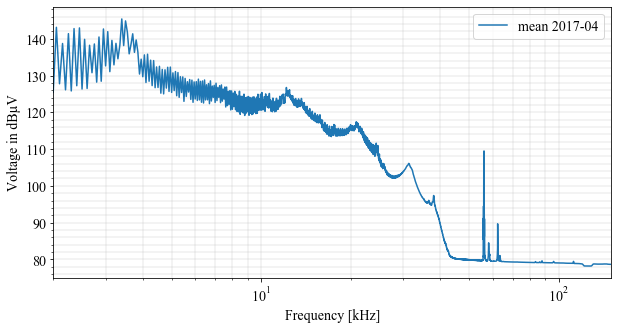

In [8]:
x = generateXAxisData()/1000
y = overall_mean
fig, ax = plt.subplots()
ax.plot(x, y, label ="mean 2017-04")
ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Voltage in dBµV')
ax.set_xscale('log')
ax.legend()

In [34]:
xytrans = x_y.transpose()

In [36]:
xytrans.shape

(2960, 2)

In [38]:
df = pd.DataFrame(xytrans)

In [45]:
df.to_excel("C:\\MDS_alle\\overall_mean_excel.xlsx")

In [47]:
pd.read_excel('C:\\MDS_alle\\overall_mean_excel.xlsx', index_col=0) 

,0,1
0,125.429633,2000
1,143.113422,2050
2,127.764561,2100
3,138.711064,2150
4,126.112003,2200
...,...,...
2955,78.655645,149750
2956,78.655050,149800
2957,78.654696,149850
2958,78.654318,149900
